In [1]:
import sys
sys.path.insert(1, 'C:/Users/raena/Documents/Imperial College London/msc_thesis/code/functions_and_classes')

from dataRead import *
from glob import glob
import pandas as pd
import numpy as np

## Check EQW over whole period

In [2]:
# Get DJI Index weights data per quarter

DJI_weights_paths = glob('../../data/dataBBG/DJI_index_weights/DJI_*.pickle')
DJI_weights_per_quarter = {}
for path in DJI_weights_paths:
    date = path.split('.')[-2].split('_')[-1]
    DJI_weights_per_quarter[date] = pd.read_pickle(path)

# Import price and volume data for each stock in the DJI Index
DJI_PX_LAST_paths = glob('../../data/dataBBG/DJI_stock_PX_LAST/* Equity.pickle')
DJI_PX_VOLUME_paths = glob('../../data/dataBBG/DJI_stock_PX_VOLUME/* Equity.pickle')

DJI_price_data = {}
DJI_volume_data = {}

for path in DJI_PX_LAST_paths:
    ticker = (' ').join(path.split('.')[-2].split('\\')[-1].split(' ')[0:1])
    # if ticker == '3277Q UN': # JP Morgan
    #     path = '../../data/dataBBG/DJI_stock_PX_LAST/JPM UN Equity.pickle'
    df = pd.read_pickle(path).set_index('date')
    df.index = pd.to_datetime(df.index)
    DJI_price_data[ticker] = df

for path in DJI_PX_VOLUME_paths:
    ticker = (' ').join(path.split('.')[-2].split('\\')[-1].split(' ')[0:1])
    df = pd.read_pickle(path).set_index('date')
    df.index = pd.to_datetime(df.index)
    # df.index = pd.to_datetime(df.index)
    DJI_volume_data[ticker] = df

trading_days = pd.to_datetime(list(DJI_price_data['AAPL'].index))

# Check Index by Equal Weights


In [14]:
from matplotlib import pyplot as plt

qDates = list(DJI_weights_per_quarter.keys())
n_q = len(qDates)
results = {}

for k in range(1,n_q):
    dat = qDates[k-1]
    datend = str(int(qDates[k]) - 1)
    weights_data = DJI_weights_per_quarter[dat]
    members = weights_data['INDX_MWEIGHT_HIST']
    wgt = weights_data.set_index('INDX_MWEIGHT_HIST')['Weight']
    prices = pd.DataFrame({ticker: DJI_price_data[ticker]['PX_LAST'] for ticker in DJI_price_data.keys()})
    tempR = prices.loc[str(dat):str(datend),members].pct_change().iloc[1:] *(1/30)
    tempR = tempR.sum(axis = 1)
    results.update((tempR).to_dict())

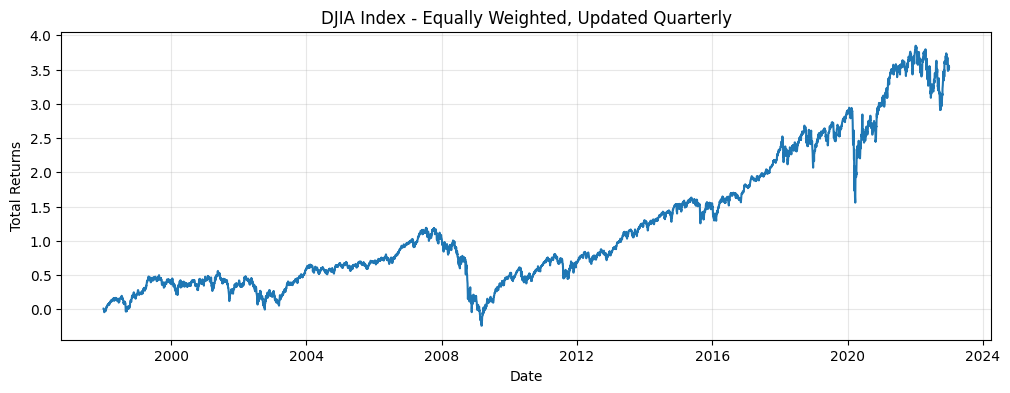

In [20]:
fpFig = '../../code/figures'

a = pd.Series(results)
a.index = pd.to_datetime(a.index)
a = (a + 1).cumprod() - 1
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(a)
ax.set_ylabel('Total Returns')
ax.set_xlabel('Date')
ax.set_title('DJIA Index - Equally Weighted, Updated Quarterly')
ax.grid(alpha=0.3)
fig.savefig(f'{fpFig}/djia_index_EQW.png', bbox_inches='tight')